# Assignment 2: Classification

**Title: Drug Classification**

Name: Lew Xin Yi

**Dataset**

Source: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

Drug Type Classification

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

**Import and Explore Data**

In [ ]:
#read the dataset csv file as a data frame
drug_df = pd.read_csv('/content/drive/MyDrive/drug200.csv')
#show the first five rows data to check if data imported correctly
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
#return the number of rows and columns in the data frame
drug_df.shape

(200, 6)

In [ ]:
#show the information of data frame like column name and data type
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
#calculate the number of unique values existed in each columns
#identify whether a column is categorical or numerical
drug_df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [ ]:
#check if the dataset consists of missing values
drug_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

There are total 6 variables in the dataset where 2 are numerical variables and the other 4 are categorical variables.

There is no missing values in this dataset.

**Categorical Variables Exploration**

In [ ]:
#print the unique value in the Sex column
drug_df.Sex.unique()

array(['F', 'M'], dtype=object)

In [ ]:
#print the unique value in the BP column
drug_df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
#print the unique value in the Cholesterol column
drug_df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
#print the unique value in the drug type column
drug_df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

**Continuous Variables Exploration**

In [ ]:
#compute the descriptive statistic for numerical variables
drug_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
#calculate the number of people that took drug in different ages
drug_df.Age.value_counts()

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

The 'Age' variable is numeric where there are a wide range of age for each individual. By binning the age variable, the data can be visualized easier in group instead of for individual.  

**Data Transformation**

In [ ]:
#transform the 'Age' variable into categorical for easier analysis
age_category = pd.cut(drug_df.Age, bins=[0,24,64,99], labels=['Youth', 'Adult', 'Senior'])
drug_df.insert(0,'Age Group',age_category)

By using pd.cut() function, the age varible is transformed into three category which are Youth (age 0-24), Adult (age 25-64), and Senior (age 65-99).

In [ ]:
#double check whether the new 'Age Group' column is added into the dataset
drug_df['Age Group'].unique()

['Youth', 'Adult', 'Senior']
Categories (3, object): ['Youth' < 'Adult' < 'Senior']

In [ ]:
#show the first five rows of new data frame created
drug_df.head()

,Age Group,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,Youth,23,F,HIGH,HIGH,25.355,DrugY
1,Adult,47,M,LOW,HIGH,13.093,drugC
2,Adult,47,M,LOW,HIGH,10.114,drugC
3,Adult,28,F,NORMAL,HIGH,7.798,drugX
4,Adult,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
#Encode target variables 
drug_df['Drug'] = drug_df['Drug'].map({'DrugY':1, 'drugX':2, 'drugA':3, 'drugB':4, 'drugC':5})
drug_df['Age Group'] = drug_df['Age Group'].map({'Youth':0, 'Adult':1, 'Senior':2})
drug_df['Sex'] = drug_df['Sex'].map({'M':1, 'F':2})
drug_df['BP'] = drug_df['BP'].map({'LOW':0, 'NORMAL':1, 'HIGH':2})
drug_df['Cholesterol'] = drug_df['Cholesterol'].map({'NORMAL':0, 'HIGH':1})

The categorical variables are then being encoded using df.map() function to numeric value to ensure the machine learning model can work with the data given as models only learn from numerical values.

In [ ]:
#add a new column to categorise the Na to Potassium Ratio ('Na_to_k') into good and bad 
drug_df.loc[(drug_df['Na_to_K'] < 29) & (drug_df['Na_to_K'] > 24.5), 'Na:K'] = 'Good'
drug_df.loc[(drug_df['Na_to_K'] > 29) | (drug_df['Na_to_K'] < 24.5),'Na:K'] = 'Bad'

**Reason of converting NaK ratio to categorical**

The sodium value in the blood for a normal adult should be from 135 to 145 while the potassium should range from 5 to 5.5. Therefore, the Na K ratio is expected to be between 24.5 and 29 for a good health condition. In contrast, individual that does not have a Na K ratio between this range will be categorised as bad health condition.

In [ ]:
#double check the encoded data
drug_df.head()

,Age Group,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na:K
0,0,23,2,2,1,25.355,1,Good
1,1,47,1,0,1,13.093,5,Bad
2,1,47,1,0,1,10.114,5,Bad
3,1,28,2,1,1,7.798,2,Bad
4,1,61,2,0,1,18.043,1,Bad


**Exploratory Data Analysis**

In [ ]:
cat_cols = ['Sex', 'BP', 'Cholesterol', 'Age Group', 'Na:K', 'Drug']
#for convenience in plotting

In [ ]:
#import required visualization libraries
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

In [ ]:
#define a function to automatically plot a bar chart and pie chart for each column
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)
    
for col in cat_cols:
    cat_summary_with_graph(drug_df,col)

**Graph Interpretation**

Each variables are being plotted as a bar chart and pie chart. 

The first graph shows that the number of male and female who has taken drugs are quite similar where male only more than female by 8.

Meanwhile, people who took drug tends to have high blood pressure where the percentage of high blood pressure accumulated to 38.5% as compared to the type of normal and low blood pressure. 

More people that took drug have high cholesterol level as compared to the normal one. The difference between number of people with high and normal cholesterol level is only six. This shows that the number of people that took drug are evenly distributed between the normal and high cholesterol level. 

About 68.5% of the people that took drug are adult who aged from 25 to 64 years while the youth and seniors only occupied about 15% each.

Overall, the people who took drugs are highly biased to the bad Na K ratio with 91.5% from the total number of people which indicates that drug have huge effect on the Na K ratio.

There are five type of drugs invovled: DrugY, DrugX, DrugA, DrugB, and DrugC. According to the graph, DrugY (label:1) is the drug that are taken most by the people where it possessed about 45.5% from the total. The second highest drug taken is the DrugX (27%), followed by DrugA (11.5%), DrugB (8%), and DrugC (8%).

In [ ]:
#find the correlation between each pair of variables in the data
cor = drug_df.corr()
cor

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,-0.102027,-0.120918,0.068234,-0.063119,0.084197
Sex,-0.102027,1.000000,0.044952,-0.008811,0.125008,-0.084964
BP,-0.120918,0.044952,1.000000,-0.032208,0.036871,-0.008388
Cholesterol,0.068234,-0.008811,-0.032208,1.000000,-0.010000,0.180129
Na_to_K,-0.063119,0.125008,0.036871,-0.010000,1.000000,-0.601548
Drug,0.084197,-0.084964,-0.008388,0.180129,-0.601548,1.000000


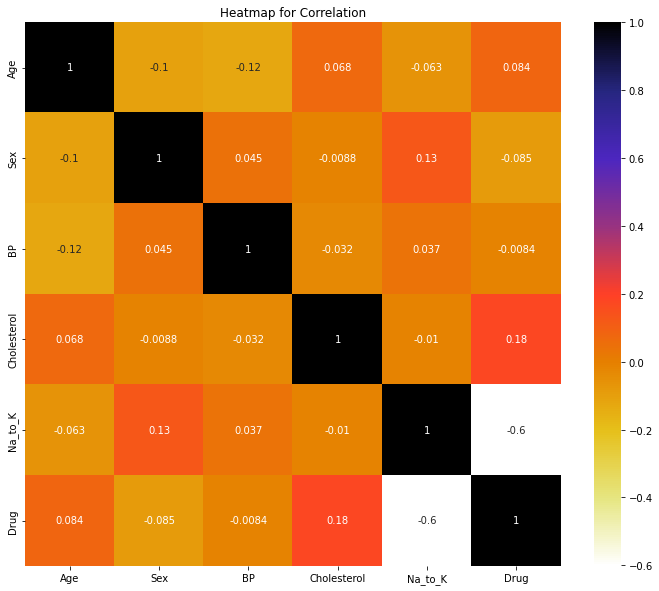

In [ ]:
#show the correlation matrix using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.title('Heatmap for Correlation')
plt.show()

**Correlation Interpretation**

There are weak correlation exist in the data.

Age is negatively correlated with Sex, Blood Pressure, and Na K ratio.

Sex is negatively correlated with Age, Drug, and Cholesterol.

Blood pressure is negatively correlated with Age abd Cholesterol.

Cholesterol is negatively correlated with Sex, Blood Pressure, and Na K ratio.

Na K ratio is negatively correlated with Age and Cholesterol.

Drug is negatively correlated with Sex, Blood Pressure, and Na K ratio while weak correlation with Age and Cholesterol.

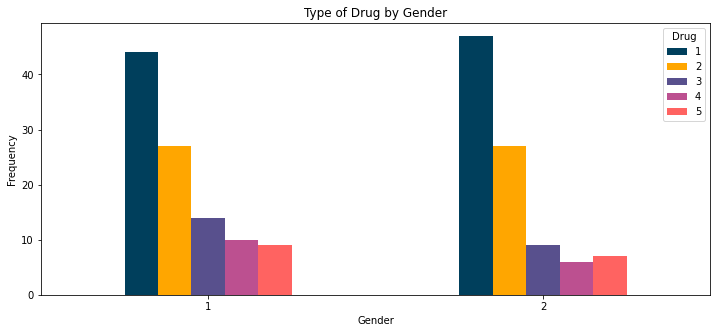

In [ ]:
#plot the type of drug and gender as clustered bar chart
pd.crosstab(drug_df.Sex,drug_df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Type of Drug by Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Bar Chart Interpretation**

The bar chart above shows that more female take drug Y (Type 1) than male. Meanwhile, drug A (Type 3), B (Type 4), and C (Type 5) are mostly been used by males than females. In terms of drug X (Type 2), both female and male seems to have a similar porportion.

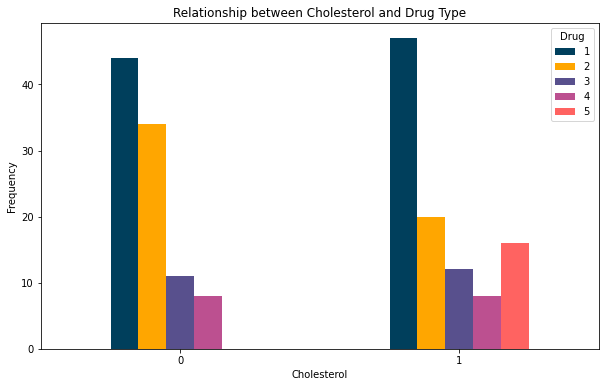

In [ ]:
#plot the cholesterol level and drug type as bar chart
pd.crosstab(drug_df['Cholesterol'], drug_df['Drug']).plot(kind="bar", figsize=(10, 6), color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Relationship between Cholesterol and Drug Type')
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

**Bar Chart Interpretation**

People that take drug C are all from the high cholesterol category. There are also more people with high cholesterol take drug Y significantly. Meanwhile, normal cholesterol level is more closely associated with the people that take drug X.

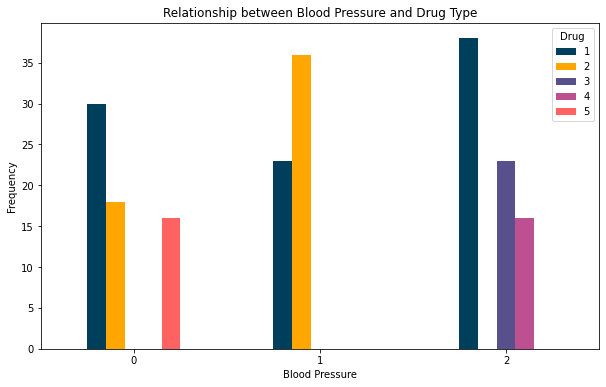

In [ ]:
#plot the blood pressure and drug type as bar chart
pd.crosstab(drug_df['BP'], drug_df['Drug']).plot(kind="bar", figsize=(10, 6), color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Relationship between Blood Pressure and Drug Type')
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

**Bar Chart Interpretation**

Drug Y is the only drug type that related to all the three blood pressure level category which include low, normal, and high blood pressure. 

All people that take drug C have low blood pressure while all people that take drug A and B have high blood pressure.

People with low blood pressure take drug Y, X, and C.

People with normal blood pressure take drug Y and X.

People with high blood pressure take drug Y, A, and B.

In [ ]:
#Add back the drug category (categorical variable) to plot the scatter plot accurately
drug_df['drug_category'] = drug_df['Drug'].replace({1:'drugY', 2:'drugX', 3:'drugA', 4:'drugB', 5:'drugC'})
drug_df.head()

,Age Group,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na:K,drug_category
0,0,23,2,2,1,25.355,1,Good,drugY
1,1,47,1,0,1,13.093,5,Bad,drugC
2,1,47,1,0,1,10.114,5,Bad,drugC
3,1,28,2,1,1,7.798,2,Bad,drugX
4,1,61,2,0,1,18.043,1,Bad,drugY


In [ ]:
#Build a scatter plot
fig = px.scatter(drug_df, x = 'Na_to_K', y='Age', color='drug_category', hover_data=['Na_to_K'],
                 title = 'Scatter Plot of NaK Ratio versus Age')
fig.update_layout(title_x=0.5)
fig.show()

**Scatter Plot Interpretation**

People that take drug Y have higher sodium potassium ratio (NA_to_K) as compared to those that take other drugs regardless of how old are them. Only drug Y is associated with NA K ratio that is more than 15.

Drug X, A, B, and C have NA K ratio that is lower than 15 that distributed sparsely on the scatter plot. 

People that take drug B are all aged above 50 years old and most fall in the category of senior. 

Drug A are only for people that aged below 50 years old.

In [ ]:
#drop the drug category variable to prevent inaccurate learning by the model
drug_df = drug_df.drop(['Na:K','drug_category'], axis=1)
drug_df.head()

,Age Group,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,2,2,1,25.355,1
1,1,47,1,0,1,13.093,5
2,1,47,1,0,1,10.114,5
3,1,28,2,1,1,7.798,2
4,1,61,2,0,1,18.043,1


**Split Data into Train and Test Set**

In [ ]:
#split data into train and test set with 80:20 ratio
from sklearn.model_selection import train_test_split

X = drug_df.drop('Drug', axis=1)
y = drug_df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

**Machine Learning Modelling**

**Random Forest Classifier**

In [ ]:
#import the algorithm library
from sklearn.ensemble import RandomForestClassifier

#fit the train dataset into the model to train and predict the model with test dataset
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
rf_predict

array([2, 1, 2, 5, 1, 1, 1, 2, 3, 2, 3, 2, 1, 3, 4, 1, 4, 2, 2, 1, 4, 2,
       2, 1, 1, 1, 5, 2, 1, 2, 1, 5, 5, 1, 3, 1, 2, 3, 1, 3])

In [ ]:
#evaluate the performance of the random forest model
from sklearn.metrics import accuracy_score
print('Random Forest Train Score: ', rf.score(X_train, y_train))
print('Random Forest Test Score: ', rf.score(X_test, y_test))
rf_acc = accuracy_score(y_test, rf_predict)
print('Random Forest Accuracy: ', rf_acc)

Random Forest Train Score:  1.0
Random Forest Test Score:  0.975
Random Forest Accuracy:  0.975


**Naive Bayes**

In [ ]:
#import required library
from sklearn.naive_bayes import GaussianNB
#initialize the Gaussian Naive Bayes algorithm
gnb = GaussianNB()
#fir the training data into the model to train
gnb.fit(X_train, y_train)
#classify the drug type using test set
gnb_predict = gnb.predict(X_test)
gnb_predict

array([2, 3, 2, 5, 1, 4, 1, 2, 3, 2, 3, 2, 5, 3, 4, 1, 4, 2, 5, 1, 4, 2,
       2, 1, 1, 1, 5, 2, 1, 2, 1, 5, 5, 1, 3, 1, 2, 3, 1, 3])

In [ ]:
#evaluate the performance of the naive bayes model
print('Naive Bayes Train Score: ', gnb.score(X_train, y_train))
print('Naive Bayes Test Score: ', gnb.score(X_test, y_test))
gnb_acc = accuracy_score(y_test, gnb_predict)
print('Naive Bayes Accuracy: ', gnb_acc)

Naive Bayes Train Score:  0.86875
Naive Bayes Test Score:  0.925
Naive Bayes Accuracy:  0.925


**K-nearest Neighbors Classifier**

In [ ]:
#import required library
from sklearn.neighbors import KNeighborsClassifier
#initialize the KNN algorithm
knn = KNeighborsClassifier()
#train the model using training dataset
knn.fit(X_train, y_train)
#predict the data using test set
knn_predict = knn.predict(X_test)
knn_predict

array([2, 1, 2, 2, 1, 1, 1, 3, 3, 2, 3, 2, 1, 2, 4, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 5, 2, 1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 2])

In [ ]:
#evaluate the performance of the KNN model
print('KNN Train Score: ', knn.score(X_train, y_train))
print('KNN Test Score: ', knn.score(X_test, y_test))
knn_acc = accuracy_score(y_test, knn_predict)
print('KNN Accuracy: ', knn_acc)

KNN Train Score:  0.78125
KNN Test Score:  0.725
KNN Accuracy:  0.725


**Support Vector Machine**

In [ ]:
#import required library
from sklearn.svm import SVC
#initialize SVM algorithm
svm = SVC(random_state = 42)
#train the model using training dataset
svm.fit(X_train, y_train)
#predict the data using test set
svm_predict = svm.predict(X_test)
svm_predict

array([2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2])

In [ ]:
#evaluate the performance of the SVM model
print('SVM Train Score: ', svm.score(X_train, y_train))
print('SVM Test Score: ', svm.score(X_test, y_test))
svm_acc = accuracy_score(y_test, svm_predict)
print('SVM Accuracy: ', svm_acc)

SVM Train Score:  0.70625
SVM Test Score:  0.625
SVM Accuracy:  0.625


**Result and Summary**

In [ ]:
pd.DataFrame(data={'Model': ['Random Forest Classifier', 'Naive Bayes', 'KNN', 'SVM'], 'Accuracy %': [rf_acc, gnb_acc, knn_acc, svm_acc]})

,Model,Accuracy %
0,Random Forest Classifier,0.975
1,Naive Bayes,0.925
2,KNN,0.725
3,SVM,0.625


Random forest outperform the others algorithms like SVM, KNN, and Naive Bayes in classifying type of drug since random forest model has the highest accuracy with 97.5%.

Therefore, the random forest model is selected as the best drug classification model and further evaluation is done.

**Random Forest as The Best Model**

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
#Calculate the confusion matrix of the model
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, y_pred)
rf_cm

array([[15,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  1,  0,  0,  4]])

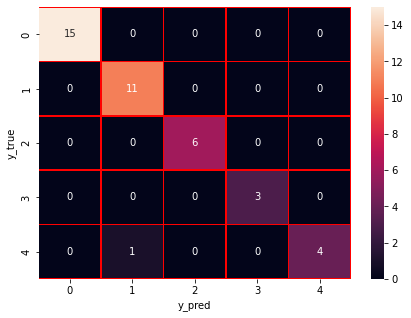

In [ ]:
#Construct a heatmap using the confusion matrix
f, ax = plt.subplots(figsize = (7,5))
sns.heatmap(rf_cm, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
#model evaluation summary
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3
           5       1.00      0.80      0.89         5

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



**Model Evaluation Interpretation**

Precision is used to find the proportion of data that is predicted positively which focus mainly on the quality. The model is highly precise which shows that the the random forest algorithm returns more relevant results than the irrelevant ones.

Recall is used to measure the ability of a model to predict the positives which focus mainly on the quantity. The model has a high recall score indicates that the model returns most of the relevant results regardless of whether the results included irrelevant results.

F1-score is the harmonic mean between precision and recall measures. F1-score has a fixed range between 0 and 1. Since the f1-score for the random forest model (0.97) is close to 1, it means that the model is best as compared to other algorithms with lower f1-score. 

**Glance of Relationship in Data**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1106: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1106: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1106: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1106: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1106: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions

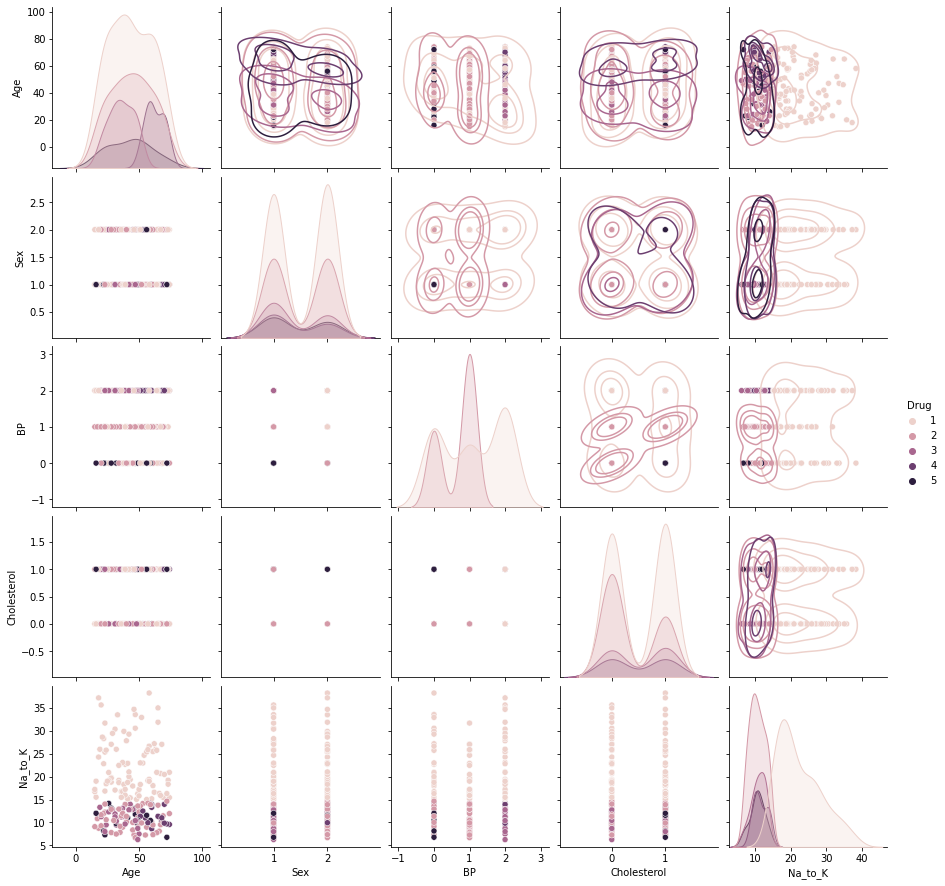

In [ ]:
#Build pairplot to show the relationships in the dataset as summary)
model = sns.pairplot(drug_df, hue = 'Drug')
model.map_upper(sns.kdeplot, levels = 4, color = '.2')
plt.show()

**Glance of Feature Importance**

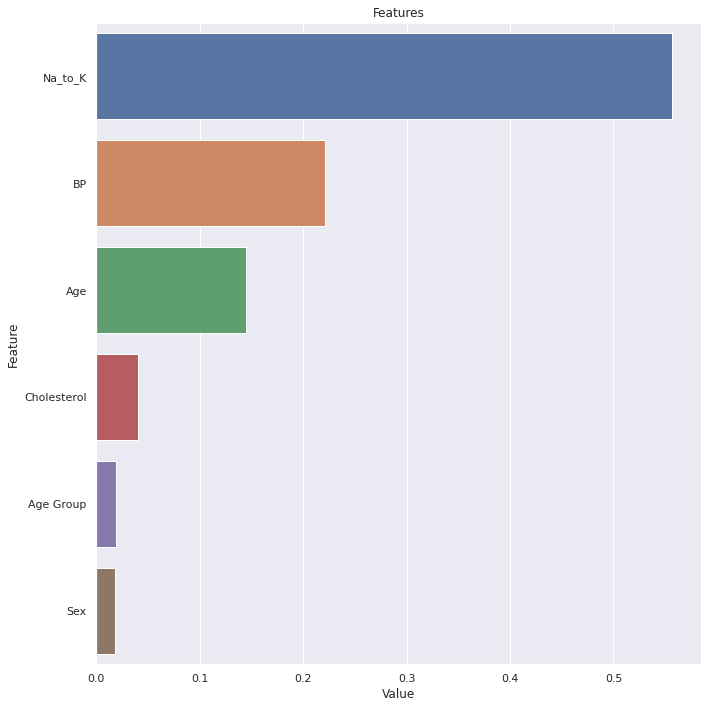

In [ ]:
#Use bar chart to show the importance of features (rank)
sns.set_theme(style="white")
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf,X_train)

The most important feature in the model is the sodium potassium ratio, followed by blood pressure, age, cholesterol, age group, and sex.